## Pedestrian Tracking and Analysis Project

Title       :  Pedestrian Movement Prediction and Analysis Model

Name        :  NIKHI PRATHISH

Organization: Entri Elevate

Overview of Problem Statement:
Pedestrian tracking is essential for analyzing movement patterns and ensuring safety in public spaces.
This project aims to track and analyze pedestrian movements using geospatial and time-series data.

# Objective
The main objectives of the project are:
Analyze pedestrian movement patterns.
Build an ML model to predict pedestrian movements.
Visualize relationships among features to derive insights.

# Data Description
# Source: UCI Machine Learning Repository
# Features:
   oid: Pedestrian ID.
   timestamp: Time of data capture.
   x, y: Coordinates of the pedestrian.
   body_roll, body_pitch
   body_yaw: Body orientation metrics.
   head_roll, head_pitch
   head_yaw: Head orientation metrics.
   other_oid, other_class, other_x, other_y: Information about nearby objects and their positions.
   
 # Data Collection
The dataset is pre-collected and contains spatial, temporal, and orientation-related features.
Data Collection




In [2]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer


import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [3]:
## Loading dataset 
data = pd.read_csv('pedastrain _track .csv')

# BASIC STATISTICS

In [4]:
# Dataframe
df = pd.DataFrame(data)
df

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4754,39406,694.2,496244.5401,5406055.865,NaN,NaN,NaN,NaN,NaN,NaN,"[39406, 38509, 39402, 39414, 39415, 39416]","[4, 0, 3, 3, 1, 3]","[496244.54009617, 496227.152782719, 496217.565...","[5406055.86543169, 5406069.02898164, 5406073.3..."
4755,39406,694.3,496244.6329,5406055.854,NaN,NaN,NaN,NaN,NaN,NaN,"[39416, 39406, 39415, 39402, 39414, 38509]","[3, 4, 1, 3, 3, 0]","[496213.205162677, 496244.63289458, 496208.076...","[5406066.94295635, 5406055.85444835, 5406071.5..."
4756,39406,694.4,496244.7329,5406055.847,NaN,NaN,NaN,NaN,NaN,NaN,"[38509, 39414, 39415, 39416, 39406, 39402]","[0, 3, 1, 3, 4, 3]","[496227.152782719, 496206.206044983, 496208.70...","[5406069.02898164, 5406068.88933245, 5406071.2..."
4757,39406,694.5,496244.8396,5406055.840,NaN,NaN,NaN,NaN,NaN,NaN,"[39415, 38509, 39402, 39406, 39414, 39416]","[1, 0, 3, 4, 3, 3]","[496209.35021584, 496227.152782719, 496217.590...","[5406070.75167456, 5406069.02898164, 5406073.4..."


In [5]:
df.head(11)

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5405750.912,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5405750.939,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5405750.966,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5405750.993,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5405751.022,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."
5,50187,1842.9,495855.4379,5405751.052,NaN,NaN,NaN,NaN,NaN,NaN,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.43789091, 495899.690271544, 495899.841...","[5405751.05247544, 5405738.97456228, 5405737.9..."
6,50187,1843.0,495855.6188,5405751.083,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50184, 50181, 50187]","[0, 4, 4, 4]","[495918.500605338, 495899.860346439, 495899.92...","[5405744.93294628, 5405738.96983389, 5405737.9..."
7,50187,1843.1,495855.7998,5405751.114,NaN,NaN,NaN,NaN,NaN,NaN,"[50181, 50184, 50187, 47646]","[4, 4, 4, 0]","[495900.031944587, 495900.017717756, 495855.79...","[5405738.00513848, 5405738.97448397, 5405751.1..."
8,50187,1843.2,495855.9636,5405751.156,NaN,NaN,NaN,NaN,NaN,NaN,"[50184, 50187, 47646, 50181]","[4, 4, 0, 4]","[495900.200273264, 495855.963615237, 495916.90...","[5405738.96255163, 5405751.15608379, 5405745.1..."
9,50187,1843.3,495856.0874,5405751.198,NaN,NaN,NaN,NaN,NaN,NaN,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495916.09265434, 495900.333131012, 495900.340...","[5405745.21860418, 5405738.01123903, 5405738.9..."


In [6]:
data.shape

(4759, 14)

# Data Preprocessing - Data Cleaning


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   oid          4759 non-null   int64  
 1   timestamp    4759 non-null   float64
 2   x            4759 non-null   float64
 3   y            4759 non-null   float64
 4   body_roll    2061 non-null   float64
 5   body_pitch   2061 non-null   float64
 6   body_yaw     2061 non-null   float64
 7   head_roll    2061 non-null   float64
 8   head_pitch   2061 non-null   float64
 9   head_yaw     2061 non-null   float64
 10  other_oid    4759 non-null   object 
 11  other_class  4759 non-null   object 
 12  other_x      4759 non-null   object 
 13  other_y      4759 non-null   object 
dtypes: float64(9), int64(1), object(4)
memory usage: 520.6+ KB


In [9]:
def delete_column(df, column_name):
    if column_name in df.columns:
        del df[column_name]
        return df
    else:
        print(f"Column '{column_name}' not found in DataFrame.")
        return df
# Deleting column 'Unnamed'
data = delete_column(data, 'Unnamed: 0')
data = delete_column(data, 'Unnamed: 0.1')

print(data)

Column 'Unnamed: 0' not found in DataFrame.
Column 'Unnamed: 0.1' not found in DataFrame.
        oid  timestamp            x            y  body_roll  body_pitch  \
0     50187     1842.4  495854.6403  5405750.912        NaN         NaN   
1     50187     1842.5  495854.7921  5405750.939        NaN         NaN   
2     50187     1842.6  495854.9438  5405750.966        NaN         NaN   
3     50187     1842.7  495855.0956  5405750.993        NaN         NaN   
4     50187     1842.8  495855.2569  5405751.022        NaN         NaN   
...     ...        ...          ...          ...        ...         ...   
4754  39406      694.2  496244.5401  5406055.865        NaN         NaN   
4755  39406      694.3  496244.6329  5406055.854        NaN         NaN   
4756  39406      694.4  496244.7329  5406055.847        NaN         NaN   
4757  39406      694.5  496244.8396  5406055.840        NaN         NaN   
4758  39406      694.6  496244.9373  5406055.838        NaN         NaN   

      bod

In [10]:
data.isnull().sum()

oid               0
timestamp         0
x                 0
y                 0
body_roll      2698
body_pitch     2698
body_yaw       2698
head_roll      2698
head_pitch     2698
head_yaw       2698
other_oid         0
other_class       0
other_x           0
other_y           0
dtype: int64

In [11]:
# filing with mean 
# filling the null values with the mean.
data['body_roll']= data['body_roll'].fillna(data['body_roll'].mean())
data.isnull().sum()

oid               0
timestamp         0
x                 0
y                 0
body_roll         0
body_pitch     2698
body_yaw       2698
head_roll      2698
head_pitch     2698
head_yaw       2698
other_oid         0
other_class       0
other_x           0
other_y           0
dtype: int64

In [12]:
# filing with mean 
# filling the null values with the mean.
data['body_pitch']= data['body_pitch'].fillna(data['body_pitch'].mean())
data.isnull().sum()

oid               0
timestamp         0
x                 0
y                 0
body_roll         0
body_pitch        0
body_yaw       2698
head_roll      2698
head_pitch     2698
head_yaw       2698
other_oid         0
other_class       0
other_x           0
other_y           0
dtype: int64

In [13]:
# filing with mean 
# filling the null values with the mean.
data['body_yaw']= data['body_yaw'].fillna(data['body_yaw'].mean())
data.isnull().sum()

oid               0
timestamp         0
x                 0
y                 0
body_roll         0
body_pitch        0
body_yaw          0
head_roll      2698
head_pitch     2698
head_yaw       2698
other_oid         0
other_class       0
other_x           0
other_y           0
dtype: int64

In [14]:
# filing with mean 
# filling the null values with the mean.
data['head_roll']= data['head_roll'].fillna(data['head_roll'].mean())
data.isnull().sum()

oid               0
timestamp         0
x                 0
y                 0
body_roll         0
body_pitch        0
body_yaw          0
head_roll         0
head_pitch     2698
head_yaw       2698
other_oid         0
other_class       0
other_x           0
other_y           0
dtype: int64

In [15]:
# filing with mean 
# filling the null values with the mean.
data['head_pitch']= data['head_pitch'].fillna(data['head_pitch'].mean())
data.isnull().sum()

oid               0
timestamp         0
x                 0
y                 0
body_roll         0
body_pitch        0
body_yaw          0
head_roll         0
head_pitch        0
head_yaw       2698
other_oid         0
other_class       0
other_x           0
other_y           0
dtype: int64

In [16]:
# filing with mean 
# filling the null values with the mean.
data['head_yaw']= data['head_yaw'].fillna(data['head_yaw'].mean())
data.isnull().sum()

oid            0
timestamp      0
x              0
y              0
body_roll      0
body_pitch     0
body_yaw       0
head_roll      0
head_pitch     0
head_yaw       0
other_oid      0
other_class    0
other_x        0
other_y        0
dtype: int64

In [17]:
data.duplicated().sum()

0

In [18]:
data.describe()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw
count,4759.000000,4759.000000,4759.000000,4.759000e+03,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000,4759.000000
mean,36158.947258,1169.678924,496070.834761,5.405964e+06,0.304014,-0.711818,190.560107,-0.253810,-1.086118,186.370247
std,15992.323879,800.496866,109.830019,1.763856e+02,0.896726,1.489126,52.968004,2.311793,3.724245,51.215811
min,7682.000000,217.500000,495813.501700,5.405731e+06,-7.000000,-18.334200,0.000000,-28.000000,-25.185200,0.000000
25%,19348.000000,317.500000,496008.570300,5.405741e+06,0.000000,-0.711818,190.560107,-0.253810,-1.086118,186.370247
50%,42054.000000,925.400000,496062.816700,5.406074e+06,0.304014,-0.711818,190.560107,-0.253810,-1.086118,186.370247
75%,49654.000000,1837.850000,496157.493300,5.406116e+06,0.304014,0.000000,190.560107,0.000000,0.000000,186.370247
max,50943.000000,2650.800000,496331.271300,5.406147e+06,10.800000,7.200000,358.000000,18.787700,19.432100,359.259000


In [19]:
data.dtypes

oid              int64
timestamp      float64
x              float64
y              float64
body_roll      float64
body_pitch     float64
body_yaw       float64
head_roll      float64
head_pitch     float64
head_yaw       float64
other_oid       object
other_class     object
other_x         object
other_y         object
dtype: object

<Axes: ylabel='other_class'>

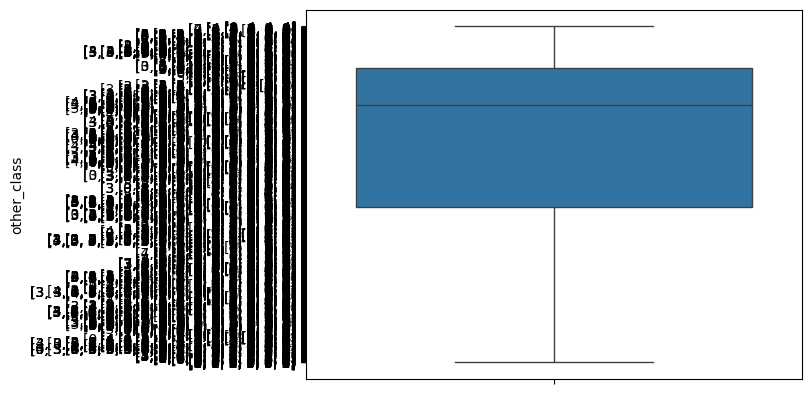

In [20]:
sns.boxplot(data['other_class'])

In [21]:
df = pd.DataFrame(data)

In [22]:
df.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,other_x,other_y
0,50187,1842.4,495854.6403,5405750.912,0.304014,-0.711818,190.560107,-0.25381,-1.086118,186.370247,"[47646, 50181, 50184, 50187]","[0, 4, 4, 4]","[495923.373133135, 495899.069769386, 495899.05...","[5405744.32136751, 5405738.47595118, 5405739.1..."
1,50187,1842.5,495854.7921,5405750.939,0.304014,-0.711818,190.560107,-0.25381,-1.086118,186.370247,"[50181, 50187, 50184, 47646]","[4, 4, 4, 0]","[495899.234566716, 495854.792078353, 495899.22...","[5405738.39126416, 5405750.93930797, 5405739.2..."
2,50187,1842.6,495854.9438,5405750.966,0.304014,-0.711818,190.560107,-0.25381,-1.086118,186.370247,"[47646, 50187, 50184, 50181]","[0, 4, 4, 4]","[495921.779445452, 495854.943847121, 495899.35...","[5405744.51929698, 5405750.96626812, 5405739.1..."
3,50187,1842.7,495855.0956,5405750.993,0.304014,-0.711818,190.560107,-0.25381,-1.086118,186.370247,"[50187, 47646, 50184, 50181]","[4, 0, 4, 4]","[495855.09561589, 495920.943052671, 495899.490...","[5405750.99322827, 5405744.63008031, 5405739.1..."
4,50187,1842.8,495855.2569,5405751.022,0.304014,-0.711818,190.560107,-0.25381,-1.086118,186.370247,"[50187, 50184, 50181, 47646]","[4, 4, 4, 0]","[495855.256935427, 495899.585908147, 495899.72...","[5405751.02150176, 5405739.0332702, 5405738.08..."


 # Outlier Detection and Handling

In [ ]:
# Box Plot for visualize outliers
columns = df.select_dtypes(include = ['number'])

for col in columns.columns:
    plt.figure(figsize=(10,6))
    columns.boxplot(column = col)
    plt.title(f" Box Plot for {col}")
    plt.ylabel('Values')
    plt.show()

# Handling Outliers

In [ ]:
# Outlier's removel with IQR
def handle_outlier(df):
    for col in df.select_dtypes(include = ['int64','float64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        lower = Q1 - 1.5 *IQR
        upper = Q3 + 1.5 *IQR

        df[col] = df[col].apply(lambda x: 
        lower if x<lower else 
        upper if x>upper else
        x)
    return df
df1 = handle_outlier(df)

# Visualize outliers after handling

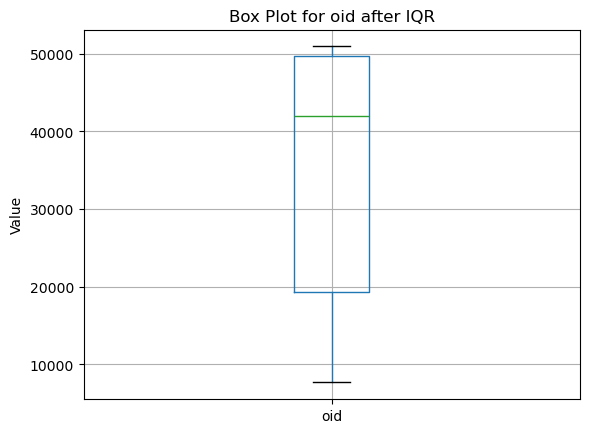

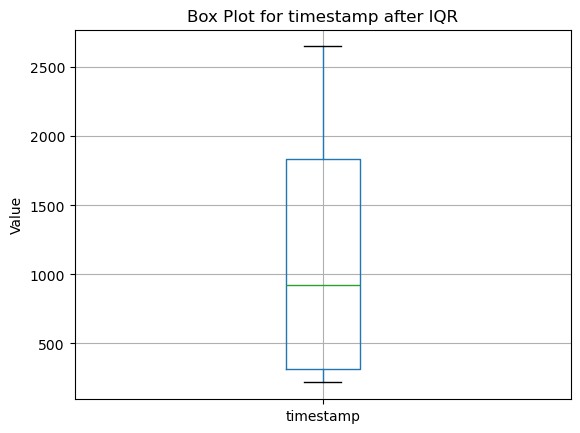

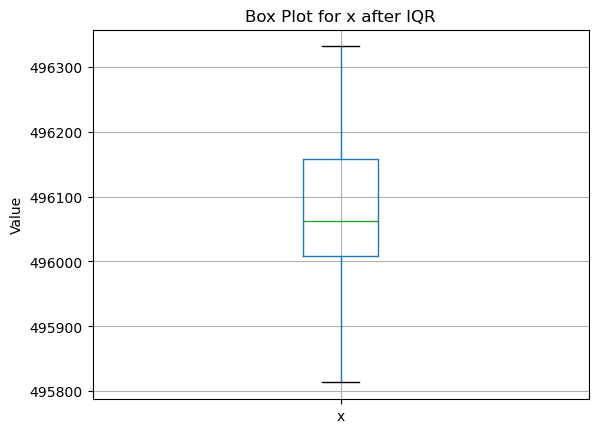

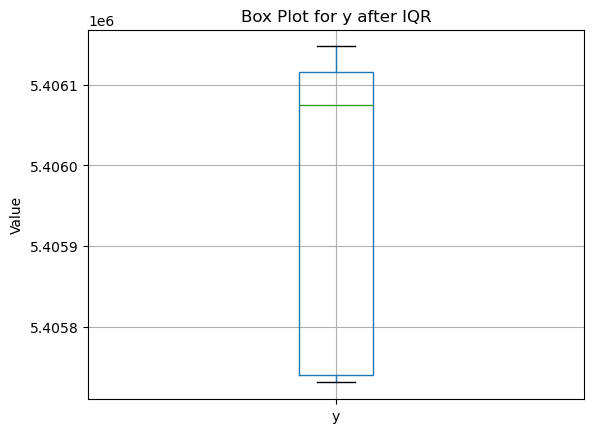

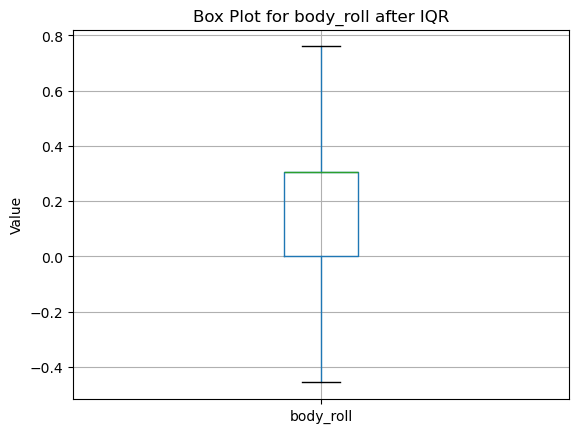

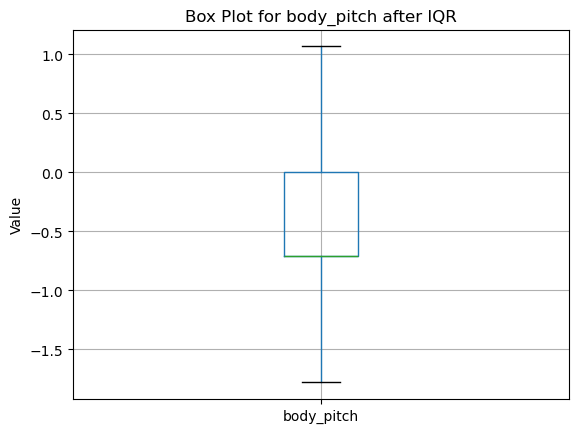

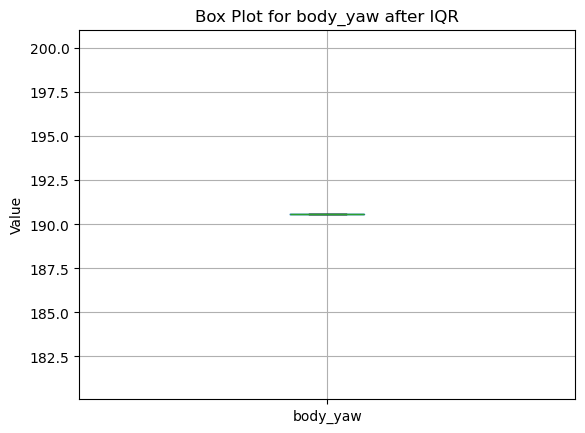

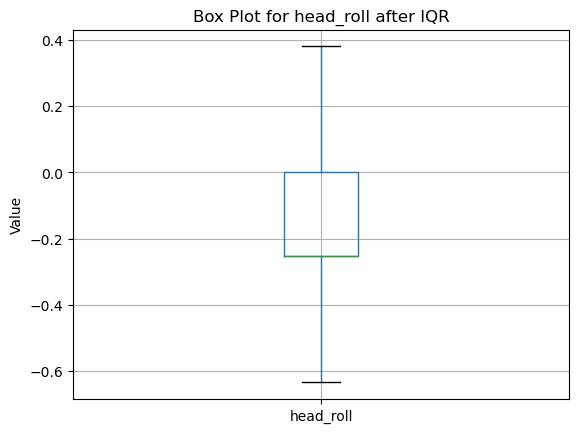

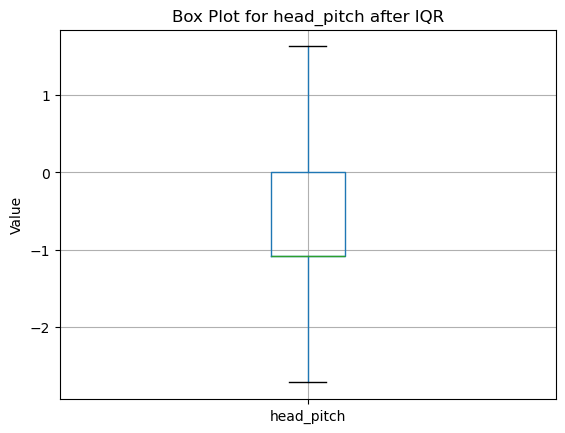

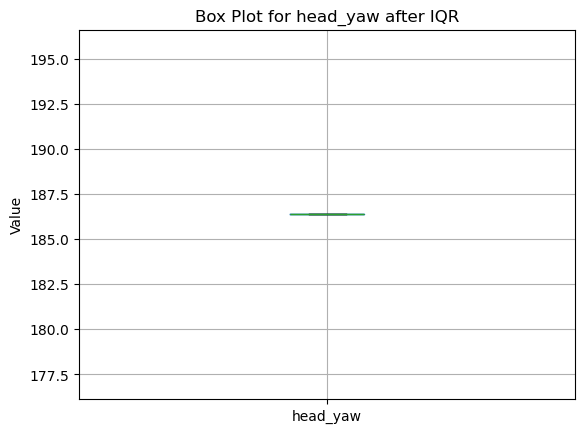

In [25]:
column = df1.select_dtypes(include=['int64','float64'])

for col in column.columns:
    plt.figure()
    column.boxplot(column = col)
    plt.title(f"Box Plot for {col} after IQR")
    plt.ylabel('Value')
    plt.show()

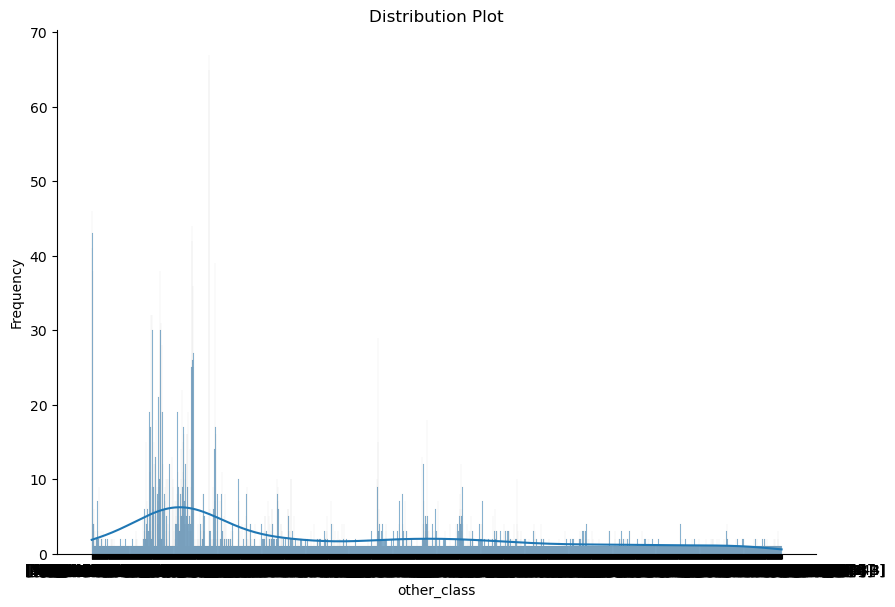

In [26]:
sns.displot(df1['other_class'], bins = 30, kde =True,height = 6, aspect = 1.5)
plt.title('Distribution Plot')
plt.xlabel('other_class')
plt.ylabel('Frequency')
plt.show()

In [27]:
print(df['other_class'].value_counts())

other_class
[4, 0]                      67
[0, 4]                      65
[4, 4, 4, 0]                46
[0, 3, 4]                   44
[4, 0, 4, 4]                43
                            ..
[3, 0, 5, 5, 3, 3, 4]        1
[5, 5, 0, 3, 3, 3, 1, 4]     1
[0, 5, 5, 3, 3, 3, 4]        1
[3, 4, 3, 5, 5, 0]           1
[1, 0, 3, 4, 3, 3]           1
Name: count, Length: 2055, dtype: int64


# Skewness for all the numerical features


In [29]:
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
numerical_cols

Index(['oid', 'timestamp', 'x', 'y', 'body_roll', 'body_pitch', 'body_yaw',
       'head_roll', 'head_pitch', 'head_yaw'],
      dtype='object')

In [30]:
categorical_cols=['class']
categorical_cols

['class']

In [31]:
# Skewness for all the numerical features

numerical_features = df1.select_dtypes(include = ['int64','float64']).columns
print('\nSkewness of all the featres:\n')
print(df[numerical_features].skew())


Skewness of all the featres:

oid          -0.709778
timestamp     0.319558
x            -0.017444
y            -0.430833
body_roll     0.105343
body_pitch   -0.286046
body_yaw      0.000000
head_roll     0.390166
head_pitch    0.460096
head_yaw      0.000000
dtype: float64


In [32]:
skewness = df1[numerical_features].apply(lambda x: skew(x))
skewed_feature = skewness[(skewness > 0.5)|(skewness < -0.5)].index
print("\nHighly Skewed Features:\n\n", skewness[skewed_feature])


Highly Skewed Features:

 oid   -0.709554
dtype: float64


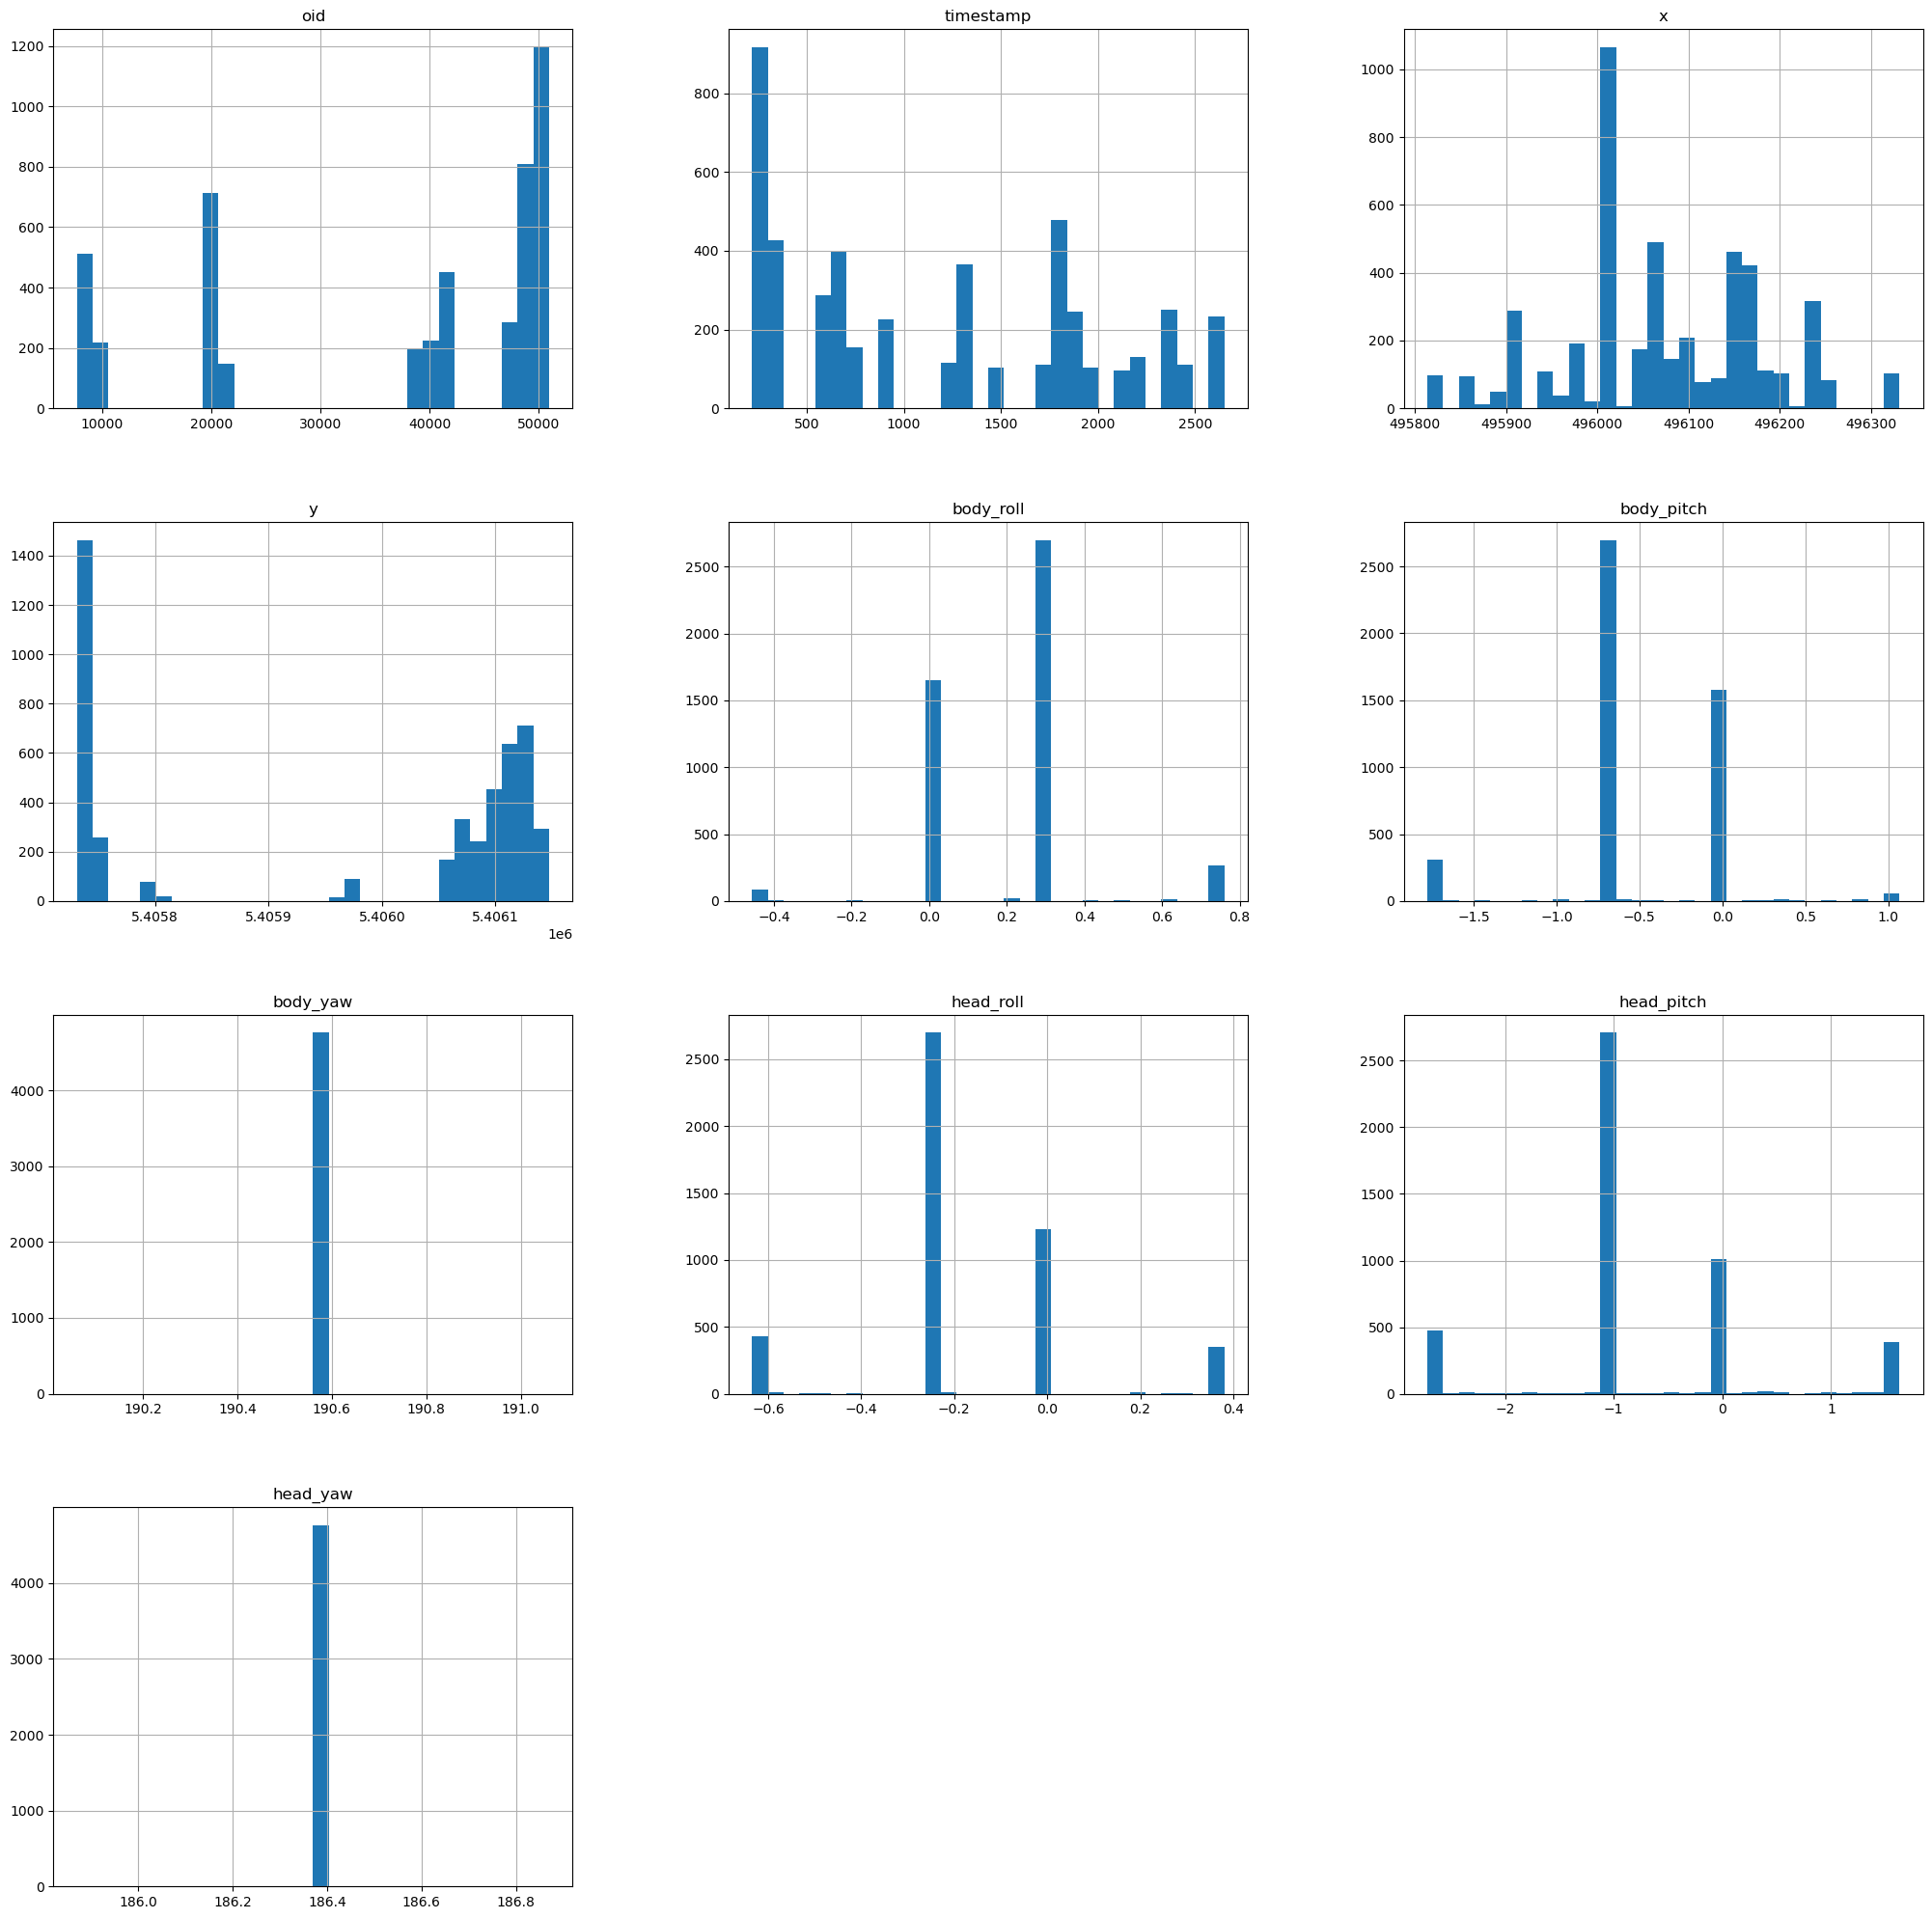

In [33]:
# ploting Histogram before transformation
df1.hist(figsize=(25,25),bins = 30)
plt.show()

#### **Handling Skewness**

In [35]:
# Applying Yoe-Johnson transformation
pt = PowerTransformer(method = 'yeo-johnson')
df1[skewed_feature] = pt.fit_transform(df1[skewed_feature])

In [36]:
# Checking Skewness after transformation
print("Skewness after transformation\n",df1[skewed_feature].skew())

Skewness after transformation
 oid   -0.590356
dtype: float64


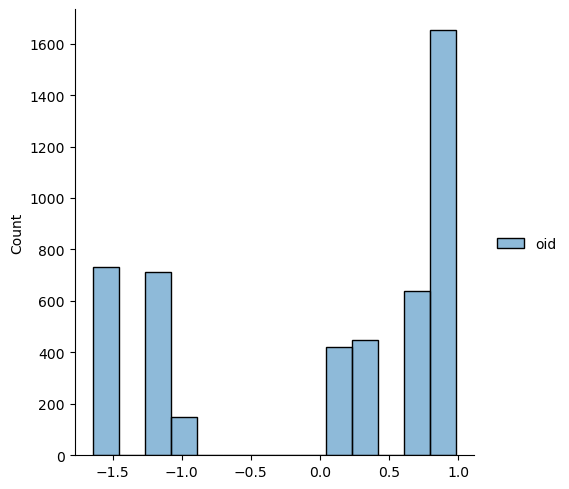

In [37]:
sns.displot(df1[skewed_feature])

In [38]:
# Kurtosis for numerical columns
df1.select_dtypes(include=[np.number]).kurt()


oid          -1.385924
timestamp    -1.299188
x            -0.354086
y            -1.742149
body_roll     1.482677
body_pitch    1.207652
body_yaw      0.000000
head_roll     0.892141
head_pitch    0.684673
head_yaw      0.000000
dtype: float64

In [39]:
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns
print(non_numeric_columns)

Index(['other_oid', 'other_class', 'other_x', 'other_y'], dtype='object')


In [40]:
for col in non_numeric_columns:
    print(f"Unique values in '{col}': {data[col].unique()}")

Unique values in 'other_oid': ['[47646, 50181, 50184, 50187]' '[50181, 50187, 50184, 47646]'
 '[47646, 50187, 50184, 50181]' ...
 '[39416, 39406, 39415, 39402, 39414, 38509]'
 '[38509, 39414, 39415, 39416, 39406, 39402]'
 '[39415, 38509, 39402, 39406, 39414, 39416]']
Unique values in 'other_class': ['[0, 4, 4, 4]' '[4, 4, 4, 0]' '[4, 0, 4, 4]' ... '[3, 4, 1, 3, 3, 0]'
 '[0, 3, 1, 3, 4, 3]' '[1, 0, 3, 4, 3, 3]']
Unique values in 'other_x': ['[495923.373133135, 495899.069769386, 495899.056786096, 495854.640309584]'
 '[495899.234566716, 495854.792078353, 495899.224798791, 495922.569930677]'
 '[495921.779445452, 495854.943847121, 495899.357695912, 495899.399364046]'
 ...
 '[496227.152782719, 496206.206044983, 496208.709010693, 496213.209496636, 496244.732890405, 496217.586267601]'
 '[496209.35021584, 496227.152782719, 496217.590361237, 496244.839638091, 496206.315632941, 496213.212539765]'
 '[496217.604900961, 496244.937343591, 496213.210667468, 496209.929524858, 496206.502629778, 496227.1

In [41]:
# Mapping categorical values to numeric values
binary_map = {'1': 1, '2': 2, 'blank': 0} 
for col in non_numeric_columns:
    data[col] = data[col].replace(binary_map)

In [42]:
# Mapping multi-class categorical values to numeric labels
other_class_map = {'1': 1, '2': 2, '3': 3, 'blank': 0}  

data['other_class'] = data['other_class'].replace(other_class_map)


In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in non_numeric_columns:
    data[col] = label_encoder.fit_transform(data[col].astype(str))


In [44]:
df1 = pd.get_dummies(data, columns=non_numeric_columns, drop_first=True)

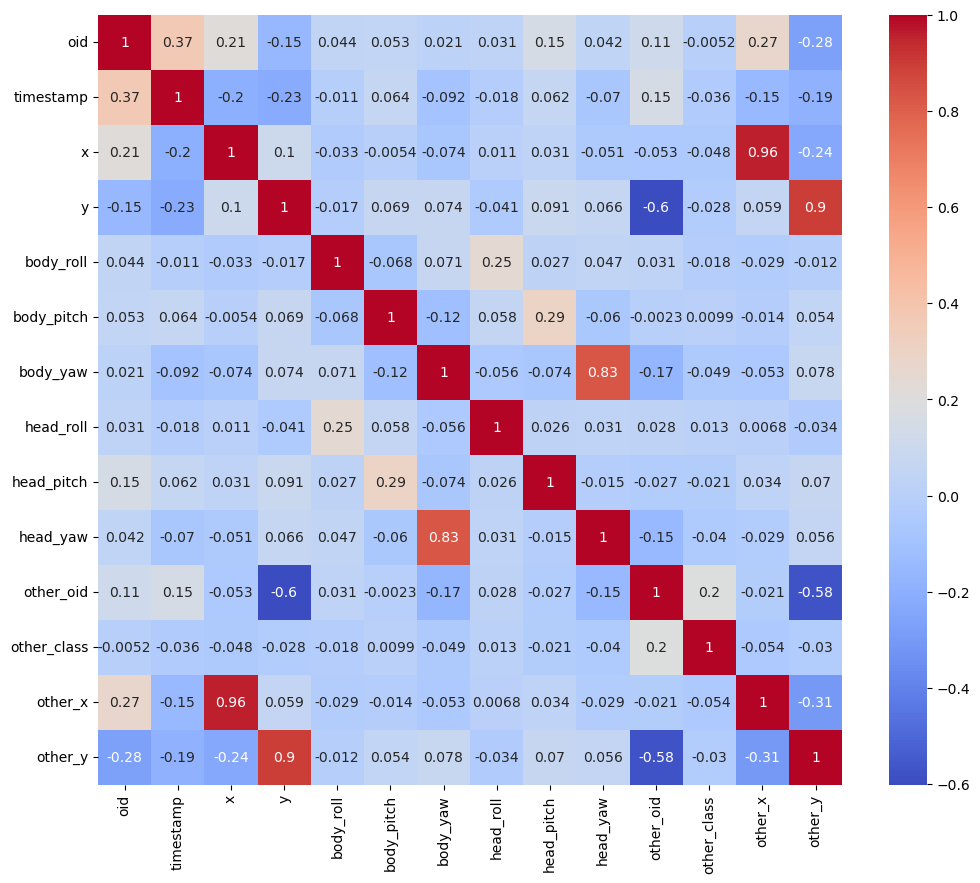

In [45]:
# Select only numeric columns after encoding
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   oid          4759 non-null   int64  
 1   timestamp    4759 non-null   float64
 2   x            4759 non-null   float64
 3   y            4759 non-null   float64
 4   body_roll    4759 non-null   float64
 5   body_pitch   4759 non-null   float64
 6   body_yaw     4759 non-null   float64
 7   head_roll    4759 non-null   float64
 8   head_pitch   4759 non-null   float64
 9   head_yaw     4759 non-null   float64
 10  other_oid    4759 non-null   int32  
 11  other_class  4759 non-null   int32  
 12  other_x      4759 non-null   int32  
 13  other_y      4759 non-null   int32  
dtypes: float64(9), int32(4), int64(1)
memory usage: 446.3 KB


In [47]:
missing_values = data.isnull().sum()
print(missing_values)

oid            0
timestamp      0
x              0
y              0
body_roll      0
body_pitch     0
body_yaw       0
head_roll      0
head_pitch     0
head_yaw       0
other_oid      0
other_class    0
other_x        0
other_y        0
dtype: int64


 # Feature Engineering

In [63]:
if 'other_class' in df.columns:
    df['other_class'] = df['other_class'].apply(lambda x: eval(x))
    df['other_class_count'] = df['other_class'].apply(len)

columns_to_drop = ['other_oid', 'other_class', 'other_x', 'other_y']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')


# # Splitting Data

In [65]:

# Splitting the Dataset
X = df.drop(columns=['oid', 'timestamp'])
y = df['oid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)